# Space Observations, class pridiction

### Context

I was looking for an unused and interesting dataset to improve my data science skills on when my professor mentioned the Sloan Digital Sky Survey which offers public data of space observations. As I found the data to be super insightful I want to share the data.

### Content

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [143]:
space_df = pd.read_csv('skyserver.csv')
space_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [144]:
cls_nms = space_df['class'].unique()
list(cls_nms)

['STAR', 'GALAXY', 'QSO']

In [66]:
sp_df =pd.DataFrame() #Creating duplicate Dataframe (sp_df) for random operations
sp_df = space_df
sp_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


## Data Wrangling (Data Cleaning):-

### Dimensions of the data

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [67]:
sp_df.shape

(10000, 18)

from the dataset we can observe that 'objid', 'specobjid' are having unique values i.e., there is no use of dealing with those columns so we can remove these columns from dataset

In [68]:
sp_df.drop(['objid','specobjid'], axis =1, inplace = True)

checking for datatypes and null values in the dataset

In [69]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [70]:
sp_df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
rerun       0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

From the above, we understood that there is no null values in data and except target variable remaining all features are numeric and datatypes float and intiger

### Processing data by defining categorical and numerical values

In [71]:
#Dividing dataframe columns into two lists one is categorical and another is continues
categorical_feat = []
continous_feat = []
for column in sp_df.columns:
    print('************************************')
    print(f"{column} : {sp_df[column].unique()}")
    if len(sp_df[column].unique()) <= 10:
        categorical_feat.append(column)
    else:
        continous_feat.append(column)

************************************
ra : [183.5313257 183.5983705 183.6802074 ... 131.5525623 131.4771511
 131.6650121]
************************************
dec : [ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]
************************************
u : [19.47406 18.6628  19.38298 ... 18.75818 18.88287 19.27586]
************************************
g : [17.0424  17.21449 18.19169 ... 17.77784 17.91068 17.37829]
************************************
r : [15.94699 16.67637 17.47428 ... 17.51872 17.53152 16.30542]
************************************
i : [15.50342 16.48922 17.08732 ... 17.43302 17.36284 15.83548]
************************************
z : [15.22531 16.3915  16.80125 ... 17.42048 17.13988 15.50588]
************************************
run : [ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
************************************
rerun : [301]
************************************
cam

From the above exploration, we identified that rerun column has only one unique value(301) and there is no impact on analysis so we can remove that column

Categorical features are :-

In [72]:
sp_df.drop(['rerun'], axis =1, inplace=True)
del categorical_feat[0]
categorical_feat

['camcol', 'class']

Numerical continues features are:-

In [73]:
continous_feat

['ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'field',
 'redshift',
 'plate',
 'mjd',
 'fiberid']

### For analyzing data with target i.e., CLASS, we have to change class field to numeric type

### encoding target variable

In [74]:
sp_df['class'] = sp_df['class'].map({
    'STAR': 0,
    'GALAXY': 1,
    'QSO':2
}.get)

In [75]:
sp_df['class'].unique()

array([0, 1, 2], dtype=int64)

In [76]:
sp_df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.000590,3306,54922,512


### Statistical Summary

In [77]:
sp_df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.669800,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,2.000000,5.353854,8410.000000,57481.000000,1000.000000


#### Obsrevations

from the statistical summary we can notice thare is a higher gap between 75 and max for columns field, dec, ra, r, i, z, redshift, plate, fiberid so we understood there are outliers existed we have to remove it

for the columns dec, run, field, plate, mjd, fiberid are having mean greater than mode so that data is right skewed

### To check correlation

In [78]:
sp_corr = sp_df.corr()
sp_corr

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,0.041189,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.091249,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,0.284541,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,0.357352,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.278678,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.205367,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.149444,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.100627,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.010269,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,-0.002610,0.015414,-0.093723,-0.086558,-0.040493


Here we can see correlation between the columns

For better understanding we can see it using heatmap visualization

<function matplotlib.pyplot.show(*args, **kw)>

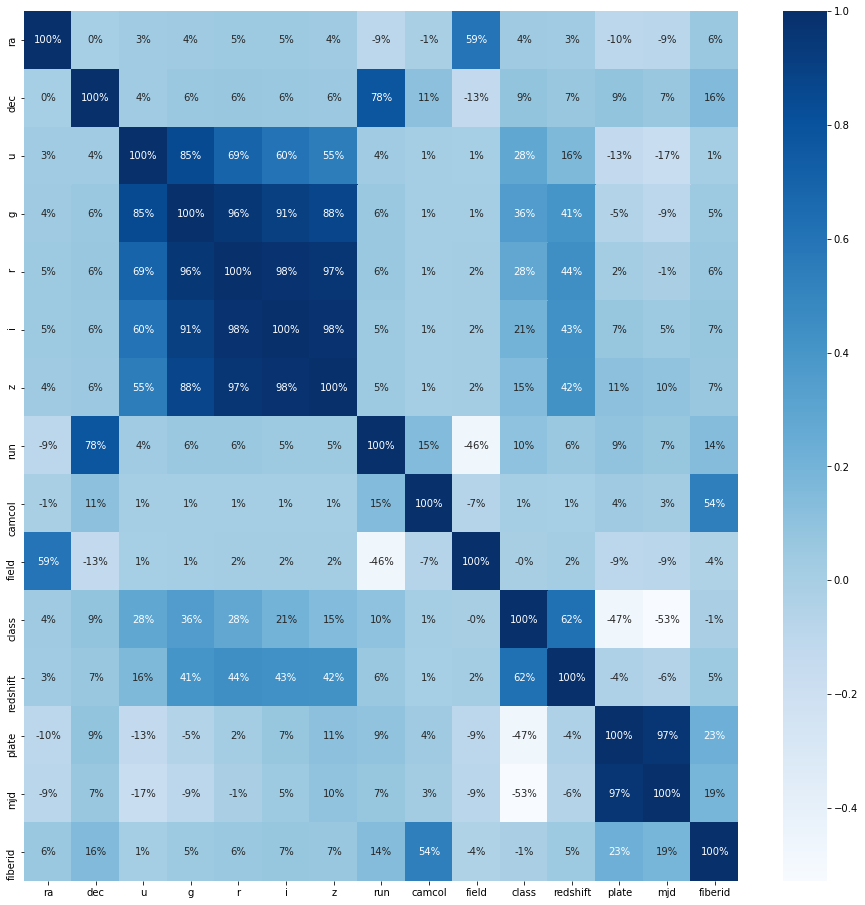

In [79]:
plt.figure(figsize=(16,16))
sns.heatmap(sp_corr, annot=True, fmt='.0%',cmap='Blues')
plt.show

Text(0.5, 1.0, 'correlation with target variable')

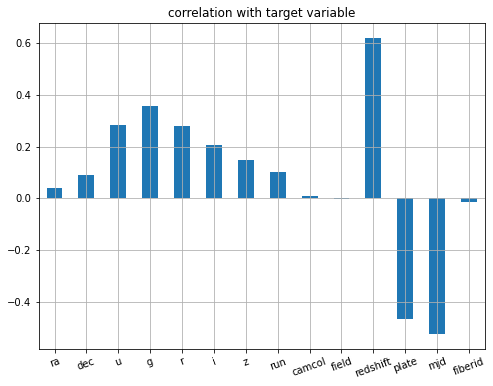

In [80]:
plt.figure(figsize=(8,6))
sp_df.drop('class', axis =1).corrwith(sp_df['class']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

### Observations:-

1. plate, mjd colums are nagatively correlated with target variable class 

2. redshift columns is highly correlated with target column class

### Univariate analysis

In [81]:
sp_df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.000590,3306,54922,512


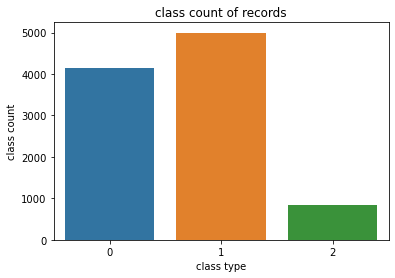

1    4998
0    4152
2     850
Name: class, dtype: int64


In [82]:
plt.subplots(figsize=(6,4))
sns.countplot(x = 'class', data=sp_df)
plt.title('class count of records')
plt.xlabel('class type')
plt.ylabel('class count')
plt.show()

print(sp_df['class'].value_counts())

Observations:-

1. 4998 records are type 1 class i.e 'GALAXY'

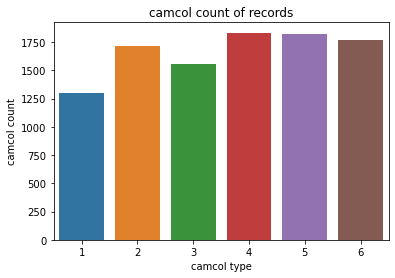

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [83]:
plt.subplots(figsize=(6,4))
sns.countplot(x = 'camcol', data=sp_df)
plt.title('camcol count of records')
plt.xlabel('camcol type')
plt.ylabel('camcol count')
plt.show()

print(sp_df['camcol'].value_counts())

Observations:-

1. 1834 are type 4 camcol

2. Type 2,6,5 and 4 are almost has same contribution in records percentage

### Bivariate Analysis:-

#### Class vs Camcol

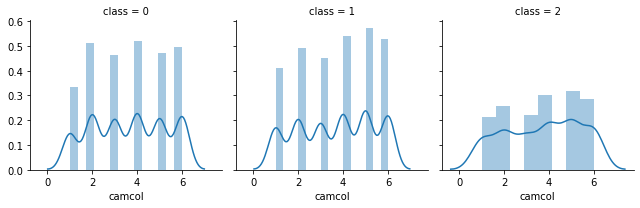

In [84]:
fg = sns.FacetGrid(sp_df, col = 'class')
fg.map(sns.distplot, 'camcol')
plt.show()

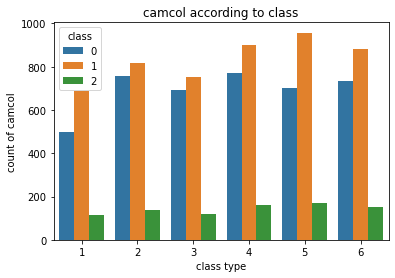

camcol  class
1       1        687
        0        497
        2        114
2       1        818
        0        758
        2        136
3       1        752
        0        690
        2        118
4       1        901
        0        772
        2        161
5       1        957
        0        700
        2        170
6       1        883
        0        735
        2        151
Name: class, dtype: int64


In [85]:
sns.countplot(x='camcol', hue = 'class', data=sp_df)
plt.title('camcol according to class')
plt.xlabel('class type')
plt.ylabel('count of camcol')
plt.show()

print(sp_df.groupby('camcol')['class'].value_counts())

### checking skew

In [86]:
sp_df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.000590,3306,54922,512


In [87]:
sp_df['class'].unique()
sp_temp = pd.DataFrame()
sp_temp = sp_df['class']

In [88]:
#Checking the skewness
sp_df1 = sp_df.drop(['redshift','class'], axis =1)
sp_df1.skew()

ra        -1.227350
dec        1.191544
u         -1.219795
g         -0.536293
r         -0.021673
i          0.286442
z          0.214313
run        0.412555
camcol    -0.100220
field      0.249795
plate      1.794609
mjd        1.039610
fiberid    0.308053
dtype: float64

In [89]:
sp_df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.000590,3306,54922,512


In [91]:
#Treating skewness via square root method and cube root method.
sp_df1.skew()
for col in sp_df1.skew().index:
    if col in sp_df1.describe().columns:
        if sp_df1[col].skew()>0.55:
            sp_df1[col]=np.sqrt(sp_df[col])
        if sp_df1[col].skew()<=0.55:
            sp_df1[col]=np.cbrt(sp_df[col])

In [92]:
sp_df1.skew()

ra        -2.773755
dec        0.482193
u         -1.315798
g         -0.658992
r         -0.189898
i          0.061700
z          0.043910
run        0.295629
camcol    -0.551075
field     -0.856990
plate      1.093870
mjd        1.025184
fiberid   -0.825261
dtype: float64

In [93]:
sp_df1.head()

,ra,dec,u,g,r,i,z,run,camcol,field,plate,mjd,fiberid
0,5.682901,0.447630,2.690412,2.573418,2.517056,2.493499,2.478499,9.093672,1.587401,6.439277,57.497826,234.354432,7.889095
1,5.683593,0.513354,2.652522,2.582050,2.554860,2.545267,2.540229,9.093672,1.587401,6.439277,17.972201,227.189348,8.148276
2,5.684437,0.501575,2.686211,2.630012,2.594975,2.575677,2.561222,9.093672,1.587401,6.447306,16.941074,228.085510,8.005205
3,5.686400,0.368184,2.609304,2.551094,2.528274,2.518914,2.514812,9.093672,1.587401,6.455315,57.497826,234.354432,7.989570
4,5.686531,0.468081,2.598730,2.533596,2.542665,2.548643,2.551633,9.093672,1.587401,6.455315,57.497826,234.354432,8.000000


In [94]:
sp_df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [95]:
le = LabelEncoder()
#sp_df1 = sp_df.drop(['redshift'], axis=1)
for col in sp_df1.columns:
    print(col)
    if sp_df1[col].dtype ==np.number:
        continue
    sp_df1[col]=le.fit_transform(sp_df1[col])

ra
dec
u
g
r
i
z
run
camcol
field
plate
mjd
fiberid


In [96]:
sp_df = pd.concat([sp_df['redshift'], sp_df1], axis=1)

In [97]:
sp_df = pd.concat([sp_df, sp_temp], axis=1)

In [98]:
sp_df.head()

,redshift,ra,dec,u,g,r,i,z,run,camcol,field,plate,mjd,fiberid,class
0,-0.000009,5.682901,0.447630,2.690412,2.573418,2.517056,2.493499,2.478499,9.093672,1.587401,6.439277,57.497826,234.354432,7.889095,0
1,-0.000055,5.683593,0.513354,2.652522,2.582050,2.554860,2.545267,2.540229,9.093672,1.587401,6.439277,17.972201,227.189348,8.148276,0
2,0.123111,5.684437,0.501575,2.686211,2.630012,2.594975,2.575677,2.561222,9.093672,1.587401,6.447306,16.941074,228.085510,8.005205,1
3,-0.000111,5.686400,0.368184,2.609304,2.551094,2.528274,2.518914,2.514812,9.093672,1.587401,6.455315,57.497826,234.354432,7.989570,0
4,0.000590,5.686531,0.468081,2.598730,2.533596,2.542665,2.548643,2.551633,9.093672,1.587401,6.455315,57.497826,234.354432,8.000000,0


redshift        AxesSubplot(0.125,0.71587;0.133621x0.16413)
ra           AxesSubplot(0.285345,0.71587;0.133621x0.16413)
dec           AxesSubplot(0.44569,0.71587;0.133621x0.16413)
u            AxesSubplot(0.606034,0.71587;0.133621x0.16413)
g            AxesSubplot(0.766379,0.71587;0.133621x0.16413)
r              AxesSubplot(0.125,0.518913;0.133621x0.16413)
i           AxesSubplot(0.285345,0.518913;0.133621x0.16413)
z            AxesSubplot(0.44569,0.518913;0.133621x0.16413)
run         AxesSubplot(0.606034,0.518913;0.133621x0.16413)
camcol      AxesSubplot(0.766379,0.518913;0.133621x0.16413)
field          AxesSubplot(0.125,0.321957;0.133621x0.16413)
plate       AxesSubplot(0.285345,0.321957;0.133621x0.16413)
mjd          AxesSubplot(0.44569,0.321957;0.133621x0.16413)
fiberid     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
class       AxesSubplot(0.766379,0.321957;0.133621x0.16413)
dtype: object

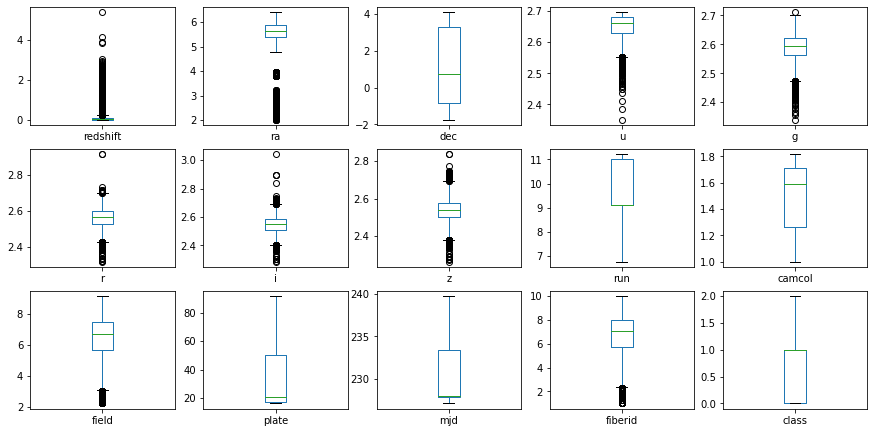

In [99]:
sp_df.plot(kind = 'box', subplots = True, layout = (4,5), figsize= (15,10))

From the box plots, we understood that there was outliers present in some columns like redshift, ra, u, g etc., we have to remove those outliers using zscore methode

### Calculating ZScore

In [101]:
z = np.abs(stats.zscore(sp_df))
z

array([[0.36973112, 0.22992532, 0.28400377, ..., 1.31369922, 0.70742926,
        1.07093597],
       [0.36984929, 0.23090661, 0.24930057, ..., 0.88404966, 0.86035558,
        1.07093597],
       [0.05302706, 0.23210409, 0.25551981, ..., 0.60916958, 0.77593841,
        0.52795321],
       ...,
       [0.37074104, 0.61678759, 1.44626538, ..., 2.66929998, 1.08923101,
        1.07093597],
       [0.33364691, 0.61816612, 1.44735697, ..., 0.70740926, 0.33755873,
        0.52795321],
       [0.06510125, 0.61473298, 1.44801882, ..., 0.70740926, 0.31666186,
        0.52795321]])

In [102]:
threshold = 3
print(np.where(z > 3))

(array([  45,  109,  129, ..., 9929, 9940, 9956], dtype=int64), array([0, 0, 0, ..., 3, 0, 0], dtype=int64))


### Removing outliers

In [103]:
sp_df_z = sp_df[z>3]
sp_df_z = sp_df_z[~sp_df_z.index.duplicated(keep='first')]
sp_df_new = pd.concat([sp_df, sp_df_z, sp_df_z]).drop_duplicates(keep=False)

In [104]:
print(sp_df.shape)
print(sp_df_new.shape)

(10000, 15)
(9000, 15)


Observed difference between old dataframe and newdataframe, there are 1000 outliers removed from old dataframe and created new dataframe

In [106]:
sp_df = sp_df_new

In [107]:
sp_df.head()

,redshift,ra,dec,u,g,r,i,z,run,camcol,field,plate,mjd,fiberid,class
0,-0.000009,5.682901,0.447630,2.690412,2.573418,2.517056,2.493499,2.478499,9.093672,1.587401,6.439277,57.497826,234.354432,7.889095,0
1,-0.000055,5.683593,0.513354,2.652522,2.582050,2.554860,2.545267,2.540229,9.093672,1.587401,6.439277,17.972201,227.189348,8.148276,0
2,0.123111,5.684437,0.501575,2.686211,2.630012,2.594975,2.575677,2.561222,9.093672,1.587401,6.447306,16.941074,228.085510,8.005205,1
3,-0.000111,5.686400,0.368184,2.609304,2.551094,2.528274,2.518914,2.514812,9.093672,1.587401,6.455315,57.497826,234.354432,7.989570,0
4,0.000590,5.686531,0.468081,2.598730,2.533596,2.542665,2.548643,2.551633,9.093672,1.587401,6.455315,57.497826,234.354432,8.000000,0


### Data Splitting into input and output

In [112]:
#spliting data into input and output
x = sp_df.drop(columns=['class'], axis = 1)
x

,redshift,ra,dec,u,g,r,i,z,run,camcol,field,plate,mjd,fiberid
0,-0.000009,5.682901,0.447630,2.690412,2.573418,2.517056,2.493499,2.478499,9.093672,1.587401,6.439277,57.497826,234.354432,7.889095
1,-0.000055,5.683593,0.513354,2.652522,2.582050,2.554860,2.545267,2.540229,9.093672,1.587401,6.439277,17.972201,227.189348,8.148276
2,0.123111,5.684437,0.501575,2.686211,2.630012,2.594975,2.575677,2.561222,9.093672,1.587401,6.447306,16.941074,228.085510,8.005205
3,-0.000111,5.686400,0.368184,2.609304,2.551094,2.528274,2.518914,2.514812,9.093672,1.587401,6.455315,57.497826,234.354432,7.989570
4,0.000590,5.686531,0.468081,2.598730,2.533596,2.542665,2.548643,2.551633,9.093672,1.587401,6.455315,57.497826,234.354432,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.027583,5.082839,3.721462,2.659843,2.594789,2.566993,2.555201,2.546115,11.038433,1.442250,5.440122,21.142375,227.765230,6.265827
9996,0.117772,5.082706,3.724631,2.633903,2.593202,2.575154,2.556914,2.556014,11.038433,1.442250,5.451362,21.142375,227.765230,6.109115
9997,-0.000402,5.085884,3.724526,2.657033,2.609915,2.597172,2.592930,2.592309,11.038433,1.442250,5.451362,85.457592,238.773952,8.536178
9998,0.014019,5.084912,3.726594,2.662907,2.616399,2.597805,2.589446,2.578315,11.038433,1.442250,5.462556,21.142375,227.765230,6.118033


In [113]:
y = sp_df['class']
y.unique()

array([0, 1, 2], dtype=int64)

### Standard scaling

In [114]:
#scaling in in input variables
ss = StandardScaler()
x = ss.fit_transform(x)

### Creating test and train data splits

In [115]:
#spliting the data into training and test data split
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = 42,test_size = 0.33, stratify=y)

In [116]:
#checking shape
print(train_x.shape, '\t\t', test_x.shape)

(6030, 14) 		 (2970, 14)


In [117]:
print(train_y.shape, '\t\t', test_y.shape)

(6030,) 		 (2970,)


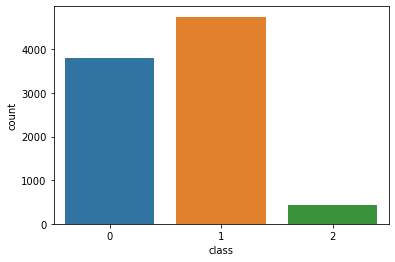

In [118]:
sns.countplot(x=sp_df['class'])

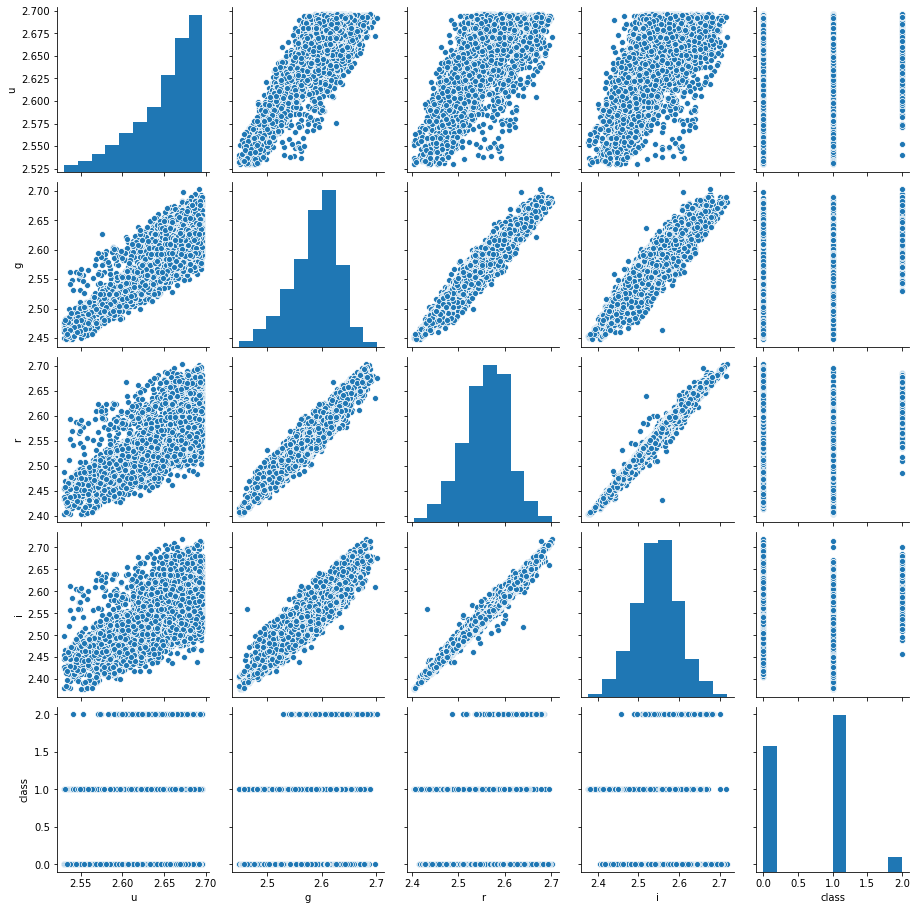

In [119]:
sns.pairplot(sp_df[['u','g','r','i','class']])

## Model Prediction

In [122]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

#Linear Classifiers:
# 1- Logistic Regression
LRClassifer = LogisticRegression()
# # 2-Naive Bayes Classifier
# NBClassifer = MultinomialNB()

#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

#Support Vector Machines Classifer
SVCModel = SVC()

rndmclf = RandomForestClassifier()

In [123]:
dtClassifer.fit(train_x, train_y)
LRClassifer.fit(train_x, train_y)

NeNeClassifier.fit(train_x, train_y)
SVCModel.fit(train_x, train_y)
rndmclf.fit(train_x,train_y)

RandomForestClassifier()

In [124]:
y_preds = dtClassifer.predict(test_x)
y_predsLR = LRClassifer.predict(test_x)

y_predsNeNe = NeNeClassifier.predict(test_x)
y_predsSVC = SVCModel.predict(test_x)
y_predsrndmclf = rndmclf.predict(test_x)

In [125]:
print(y_preds[:10],'\n',test_y[:10])
print("*******************************************************")
print(y_predsLR[:10],'\n',test_y[:10])
print("*******************************************************")

print(y_predsNeNe[:10],'\n',test_y[:10])
print("*******************************************************")
print(y_predsSVC[:10],'\n',test_y[:10])
print("*******************************************************")
print(y_predsrndmclf[:10],'\n',test_y[:10])

[1 1 1 1 0 1 0 1 1 0] 
 5647    1
9880    1
2290    1
4126    1
5790    0
7247    1
7211    0
9037    1
2740    1
8135    0
Name: class, dtype: int64
*******************************************************
[1 1 1 1 0 1 0 1 1 0] 
 5647    1
9880    1
2290    1
4126    1
5790    0
7247    1
7211    0
9037    1
2740    1
8135    0
Name: class, dtype: int64
*******************************************************
[1 1 0 1 1 0 0 1 1 0] 
 5647    1
9880    1
2290    1
4126    1
5790    0
7247    1
7211    0
9037    1
2740    1
8135    0
Name: class, dtype: int64
*******************************************************
[1 1 1 1 0 1 0 1 1 0] 
 5647    1
9880    1
2290    1
4126    1
5790    0
7247    1
7211    0
9037    1
2740    1
8135    0
Name: class, dtype: int64
*******************************************************
[1 1 1 1 0 1 0 1 1 0] 
 5647    1
9880    1
2290    1
4126    1
5790    0
7247    1
7211    0
9037    1
2740    1
8135    0
Name: class, dtype: int64


In [126]:
print('accuracy_score by Decision Tree Classifier:',accuracy_score(y_true=test_y, y_pred=y_preds)*100)
print('accuracy_score by LR Classifier:',accuracy_score(y_true=test_y, y_pred=y_predsLR)*100)
print('accuracy_score by Nearest Neighbor Classifier:',accuracy_score(y_true=test_y, y_pred=y_predsNeNe)*100)
print('accuracy_score by SVM Classifier:',accuracy_score(y_true=test_y, y_pred=y_predsSVC)*100)
print('accuracy_score by random forest Classifier:',accuracy_score(y_true=test_y, y_pred=y_predsrndmclf)*100)

accuracy_score by Decision Tree Classifier: 98.58585858585859
accuracy_score by LR Classifier: 98.08080808080808
accuracy_score by Nearest Neighbor Classifier: 91.44781144781145
accuracy_score by SVM Classifier: 97.07070707070707
accuracy_score by random forest Classifier: 98.75420875420875


Random Forest Classifier has the highest score we can apply neural networks to this data, but it is likely that we will get good results because the volume of training data is not much.

### Training Complexity

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_x)
train_x_scaled = scaling.transform(train_x)
test_x_scaled = scaling.transform(test_x)

### Hyperparameter Optimisation

In [133]:
from pprint import pprint
pprint(rndmclf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Tuning Using Random Search

In [134]:
hyperparameters = {'max_features':[None, 'auto', 'sqrt', 'log2'],
                   'max_depth':[None, 1, 5, 10, 15, 20],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                   'criterion': ['gini', 'entropy']}
rf_random = RandomizedSearchCV(rndmclf, hyperparameters, n_iter = 100, cv = 10, verbose=2, random_state=123, n_jobs = -1)
rf_random.fit(train_x, train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.0min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 5, 10, 15, 20],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=123, verbose=2)

In [136]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy'}

In [137]:
hyperparameters = {'max_features':[None],
                   'max_depth':[14, 15, 16],
                   'min_samples_leaf': [1, 2, 3],
                   'min_samples_split': [4, 5, 6],
                   'n_estimators': [90, 100, 110],
                   'criterion': ['entropy']}
rf_grid = GridSearchCV(rndmclf, hyperparameters, cv = 10, n_jobs = -1, verbose = 2)
rf_grid.fit(train_x, train_y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 31.6min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [14, 15, 16],
                         'max_features': [None], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [90, 100, 110]},
             verbose=2)

In [138]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

### Training the Classifier

In [139]:
rndmclf.set_params(criterion = 'entropy', max_features = None, max_depth = 14, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 100)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=None,
                       min_samples_leaf=2, min_samples_split=5)

### Testing and Evaluation

### Accuracy Score and F1 Score

In [141]:
cls_nms = space_df['class'].unique()
list(cls_nms)

[0, 1, 2]

In [145]:
cls_nms = space_df['class'].unique()
list(cls_nms)
accscore = accuracy_score(test_y, y_pred=y_predsrndmclf)
f1score = f1_score(test_y, y_pred=y_predsrndmclf, average = None)
print(accscore)
for i in range(0,3):
    print((cls_nms[i], f1score[i]*100), end=" ")

0.9875420875420875
('STAR', 99.72277227722772) ('GALAXY', 98.85423297262889) ('QSO', 88.64468864468866) 

In [147]:
cm = confusion_matrix(test_y, y_pred=y_predsrndmclf)
print(classification_report(test_y, y_pred=y_predsrndmclf))
print(cm)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1259
           1       0.99      0.99      0.99      1568
           2       0.93      0.85      0.89       143

    accuracy                           0.99      2970
   macro avg       0.97      0.95      0.96      2970
weighted avg       0.99      0.99      0.99      2970

[[1259    0    0]
 [   6 1553    9]
 [   1   21  121]]


Text(28.5, 0.5, 'True')

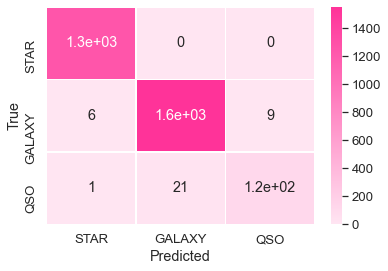

In [148]:
cm = pd.DataFrame(cm, index=cls_nms, columns=cls_nms)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [152]:
x_df = sp_df.drop(['class'], axis=1)

In [153]:
feature_imp = pd.Series(rndmclf.feature_importances_,index=x_df.columns).sort_values(ascending=False)
feature_imp

redshift    0.529840
plate       0.144696
mjd         0.119564
z           0.050234
i           0.041928
r           0.031621
g           0.029290
u           0.026387
fiberid     0.006455
dec         0.005821
ra          0.004998
field       0.004834
run         0.002713
camcol      0.001619
dtype: float64

No handles with labels found to put in legend.


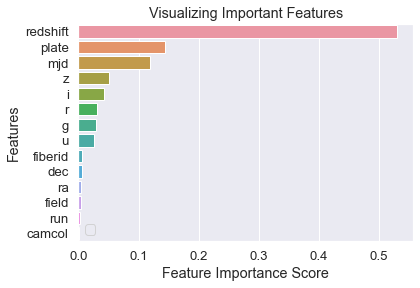

In [154]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### From the feature importance, we can understood that most impacting features on class type

## Conclusion

RandomForestClassifier machine learning model gives us highest predict score 98.75%

accuracy and f1score meets the best for three STAR, GALAXY and QSO i.e, 99.72%, 98.85% and 88.64%